In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Zomato data .csv')

In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
def Handlerate(value):
    value=str(value).split('/') 
    value=value[0];
    return float (value)

df['rate']=df['rate'].apply(Handlerate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Type of resturant

Text(0, 0.5, 'Count')

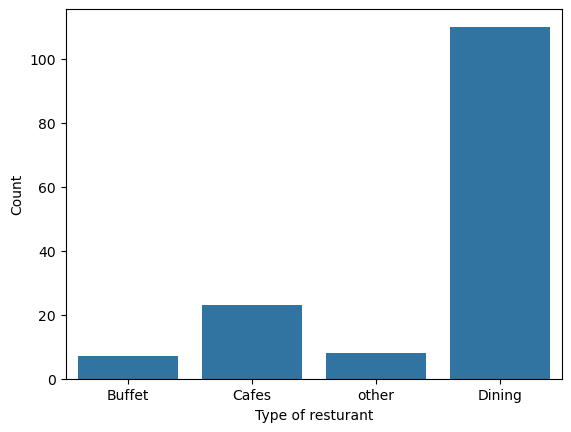

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of resturant')
plt.ylabel( 'Count')

conclusion - majority of the resturant falls in dinning category

Text(0, 0.5, 'Votes')

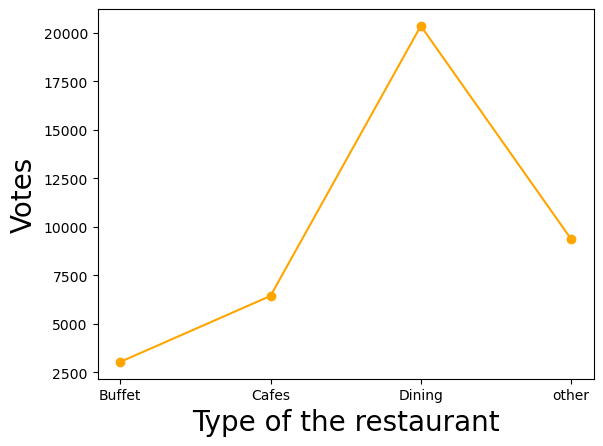

In [13]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data}).reset_index()
plt.plot(result['listed_in(type)'], result['votes'], color='orange', marker='o')
plt.xlabel('Type of the restaurant', color='black', size=20)
plt.ylabel('Votes', color='black', size=20)

Conclusion -Dinning resturants has recieved maximum votes

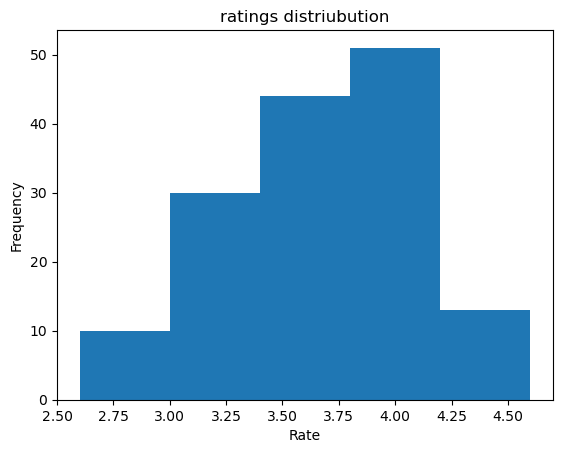

In [15]:
plt.hist(df['rate'],bins =5)
plt.title('ratings distriubution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

Conclusion-The majority resturants received ratings from 3.5 to 4

In [17]:
#Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

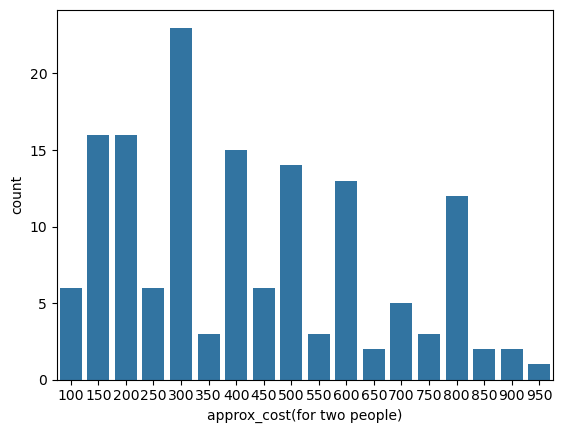

In [18]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion-The majority of couples prefer resturants with an approx cost of 300 Rs

In [20]:
#which mode received maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

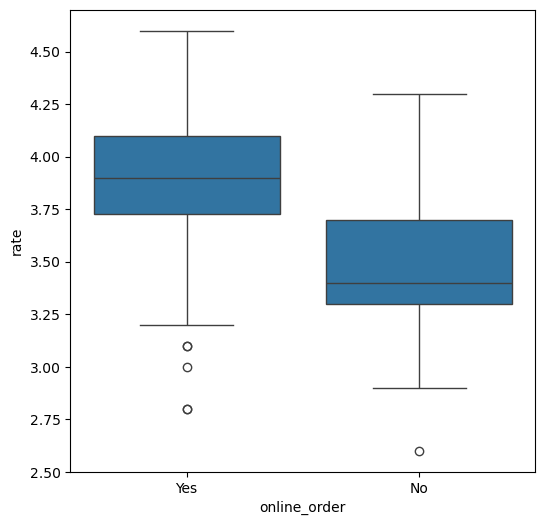

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Conculsion -offline order received lower rating in comparsion to onine order 

Text(50.722222222222214, 0.5, 'listed in (type)')

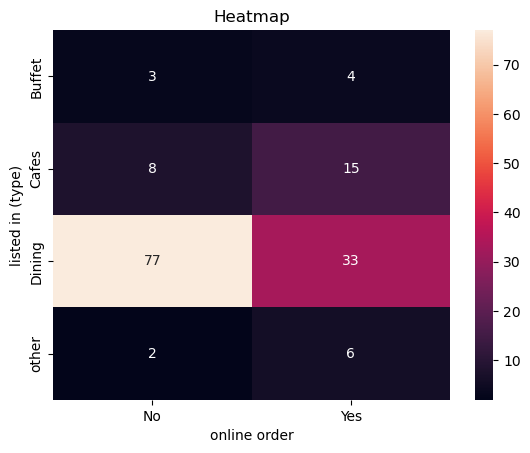

In [32]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed in (type)')


Conclusion=Dining restaurants primarliy accpet offline ordes,whereas cafes primarily recevie online order.This suggests that clients preferr orders in person at restaurnats,but prefer online ordering at cafes. 